In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


In [2]:
# Load the dataset
df = pd.read_csv('../data/amazon_fashion_reviews.csv')
print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (1597, 27)


,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [ ]:
# List all columns
print(df.columns)

Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight', 'text_length', 'word_count'],
      dtype='object')


In [8]:
# 4️⃣ Check missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 id                         0
asins                      0
brand                      0
categories                 0
colors                   823
dateAdded                  0
dateUpdated                0
dimension               1032
ean                      699
keys                       0
manufacturer             632
manufacturerNumber       695
name                       0
prices                     0
reviews.date             380
reviews.doRecommend     1058
reviews.numHelpful       697
reviews.rating           420
reviews.sourceURLs         0
reviews.text               0
reviews.title             17
reviews.userCity        1597
reviews.userProvince    1597
reviews.username          17
sizes                   1597
upc                      699
weight                   911
text_length                0
word_count                 0
dtype: int64


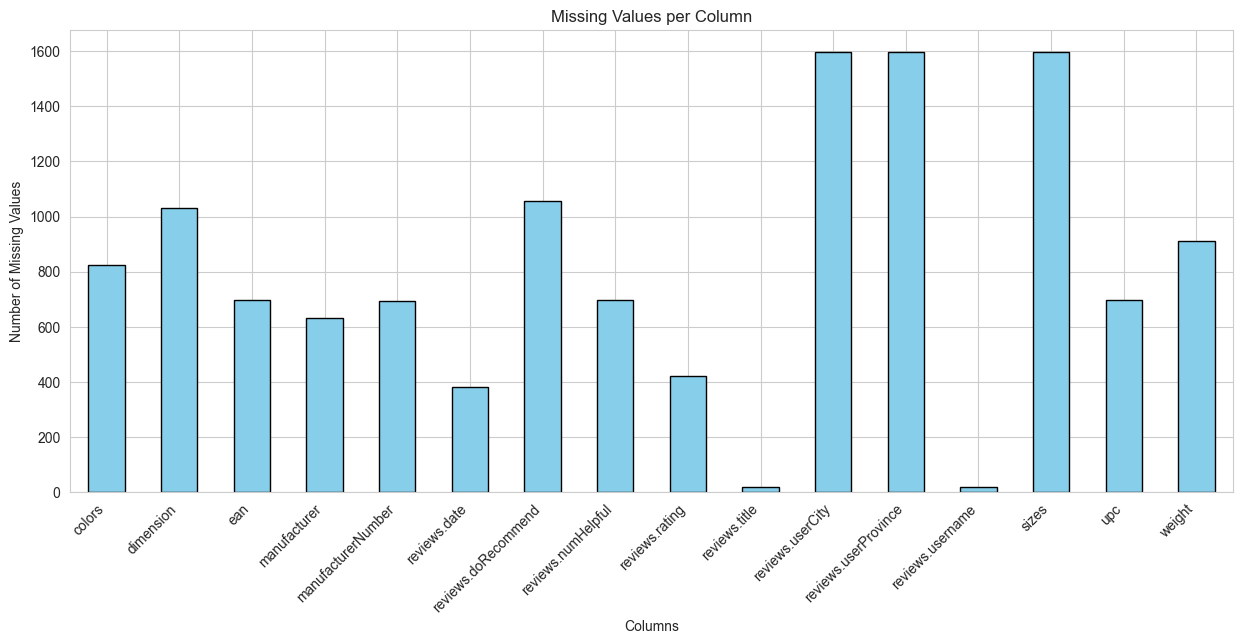

In [10]:
# Filter only columns that have missing values (optional)
missing_values = missing_values[missing_values > 0]

# Plot bar graph
plt.figure(figsize=(15, 6))
missing_values.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.show()


In [15]:
# Drop columns not useful for prediction
columns_to_drop = [
    'colors', 'dimension', 'ean', 'manufacturer', 'manufacturerNumber',
    'reviews.userCity', 'reviews.userProvince', 'reviews.doRecommend',
    'reviews.numHelpful', 'upc'
]

df = df.drop(columns=columns_to_drop, errors='ignore')
print("Remaining columns used for prediction:", df.columns.tolist())


Remaining columns used for prediction: ['id', 'asins', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'keys', 'name', 'prices', 'reviews.date', 'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title', 'reviews.username', 'sizes', 'weight', 'text_length', 'word_count']


Justification for report:
Only useful columns for sentiment prediction kept:
reviews.text → text modality
reviews.rating → target sentiment
reviews.title → optional text feature
imageURLs → image modality
brand, categories, name → contextual product info

In [16]:
# Drop rows missing critical info (reviews.text, reviews.rating)
df = df.dropna(subset=['reviews.text','reviews.rating'])
df = df.reset_index(drop=True)
print("Total reviews after dropping missing:", len(df))


Total reviews after dropping missing: 1177


In [17]:
# Map ratings to 3-class sentiment
# 0 = Negative (1-2), 1 = Neutral (3), 2 = Positive (4-5)
def map_sentiment(rating):
    if rating <= 2: return 0
    elif rating == 3: return 1
    else: return 2

df['sentiment'] = df['reviews.rating'].apply(map_sentiment)
print("Sentiment distribution:\n", df['sentiment'].value_counts())


Sentiment distribution:
 sentiment
2    977
1    124
0     76
Name: count, dtype: int64


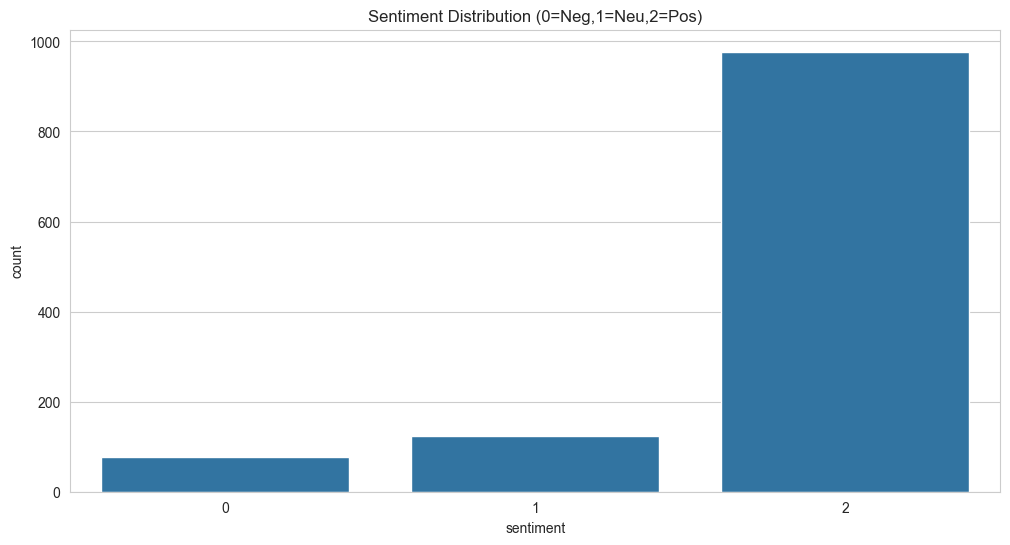

In [18]:
# Visualize sentiment distribution
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution (0=Neg,1=Neu,2=Pos)")
plt.show()


Mean text length: 735.9566694987255 characters
Mean word count: 134.91163976210706 words


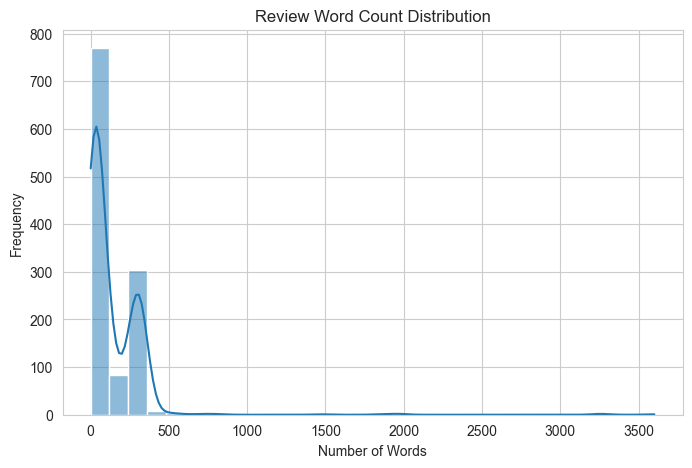

In [19]:
#  Review text length analysis
df['text_length'] = df['reviews.text'].apply(lambda x: len(str(x)))
df['word_count'] = df['reviews.text'].apply(lambda x: len(str(x).split()))

print("Mean text length:", df['text_length'].mean(), "characters")
print("Mean word count:", df['word_count'].mean(), "words")

# Plot word count distribution
plt.figure(figsize=(8,5))
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title("Review Word Count Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


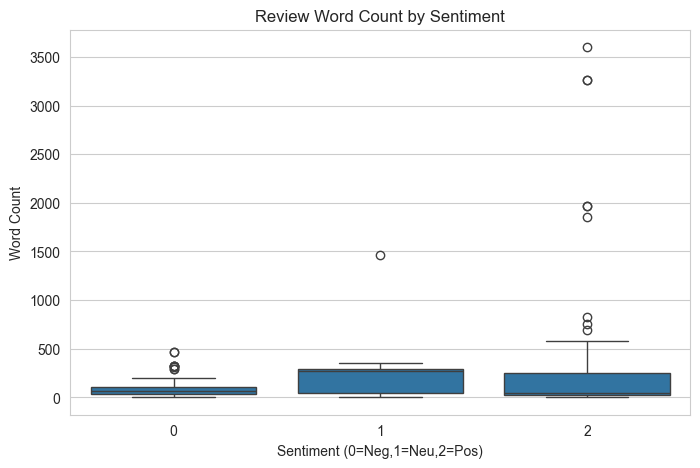

In [20]:
# Review length by sentiment
plt.figure(figsize=(8,5))
sns.boxplot(x='sentiment', y='word_count', data=df)
plt.title("Review Word Count by Sentiment")
plt.xlabel("Sentiment (0=Neg,1=Neu,2=Pos)")
plt.ylabel("Word Count")
plt.show()


In [23]:
from collections import Counter
import re
# Top words per sentiment
def get_top_words(text_series, n=20):
    all_words = " ".join(text_series.astype(str)).lower()
    all_words = re.sub(r'[^a-zA-Z\s]', '', all_words)
    words = all_words.split()
    return Counter(words).most_common(n)

print("Top words in Positive reviews:", get_top_words(df[df['sentiment']==2]['reviews.text']))
print("Top words in Negative reviews:", get_top_words(df[df['sentiment']==0]['reviews.text']))
print("Top words in Neutral reviews:", get_top_words(df[df['sentiment']==1]['reviews.text']))


Top words in Positive reviews: [('the', 7219), ('to', 3761), ('and', 3480), ('i', 3325), ('a', 3045), ('is', 2378), ('it', 2374), ('of', 1852), ('for', 1736), ('you', 1531), ('this', 1472), ('my', 1326), ('that', 1326), ('in', 1162), ('with', 1108), ('have', 1021), ('on', 1002), ('but', 991), ('are', 912), ('not', 875)]
Top words in Negative reviews: [('the', 416), ('i', 244), ('it', 220), ('to', 195), ('a', 194), ('and', 172), ('of', 129), ('is', 117), ('for', 100), ('this', 91), ('on', 87), ('my', 81), ('with', 78), ('that', 72), ('have', 69), ('in', 65), ('not', 64), ('but', 61), ('was', 53), ('you', 52)]
Top words in Neutral reviews: [('the', 915), ('to', 715), ('i', 684), ('a', 614), ('and', 497), ('of', 316), ('it', 310), ('as', 296), ('for', 263), ('this', 253), ('but', 249), ('is', 243), ('have', 208), ('im', 205), ('that', 204), ('more', 198), ('they', 178), ('not', 176), ('dont', 175), ('my', 172)]


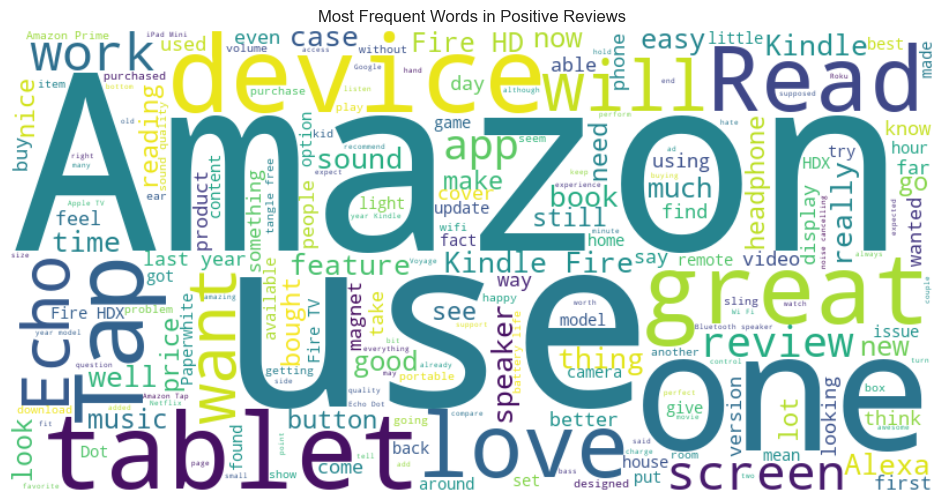

In [24]:
from wordcloud import WordCloud

# Word cloud for positive reviews
positive_text = " ".join(df[df['sentiment']==2]['reviews.text'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Positive Reviews")
plt.show()


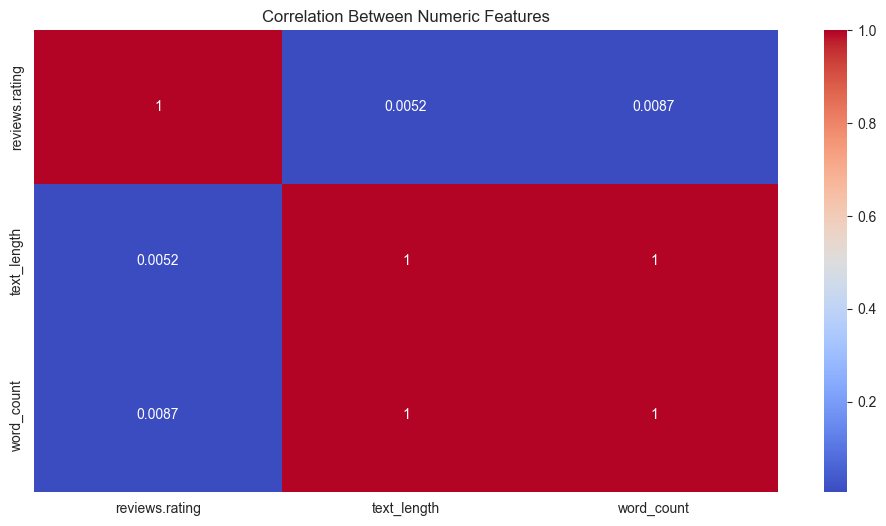

In [25]:
#  Numeric correlation analysis
numeric_cols = ['reviews.rating','text_length','word_count']
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()


In [34]:
import requests
from io import BytesIO

# Sample product images (for image modality understanding)
sample_urls = df['reviews.sourceURLs'].dropna().sample(4, random_state=42)
plt.figure(figsize=(12,6))
for i, url in enumerate(sample_urls):
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        plt.subplot(1,4,i+1)
        plt.imshow(img)
        plt.axis('off')
    except:
        pass
plt.suptitle("Sample Product Images")
plt.show()


<Figure size 1200x600 with 0 Axes>

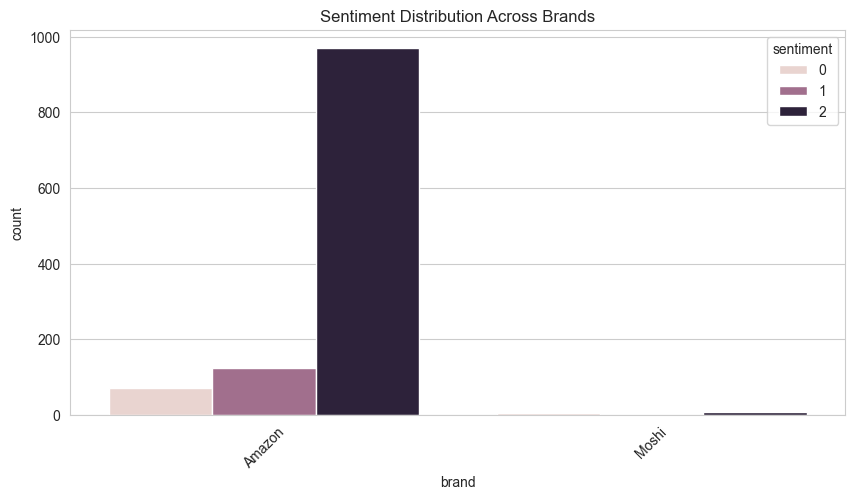

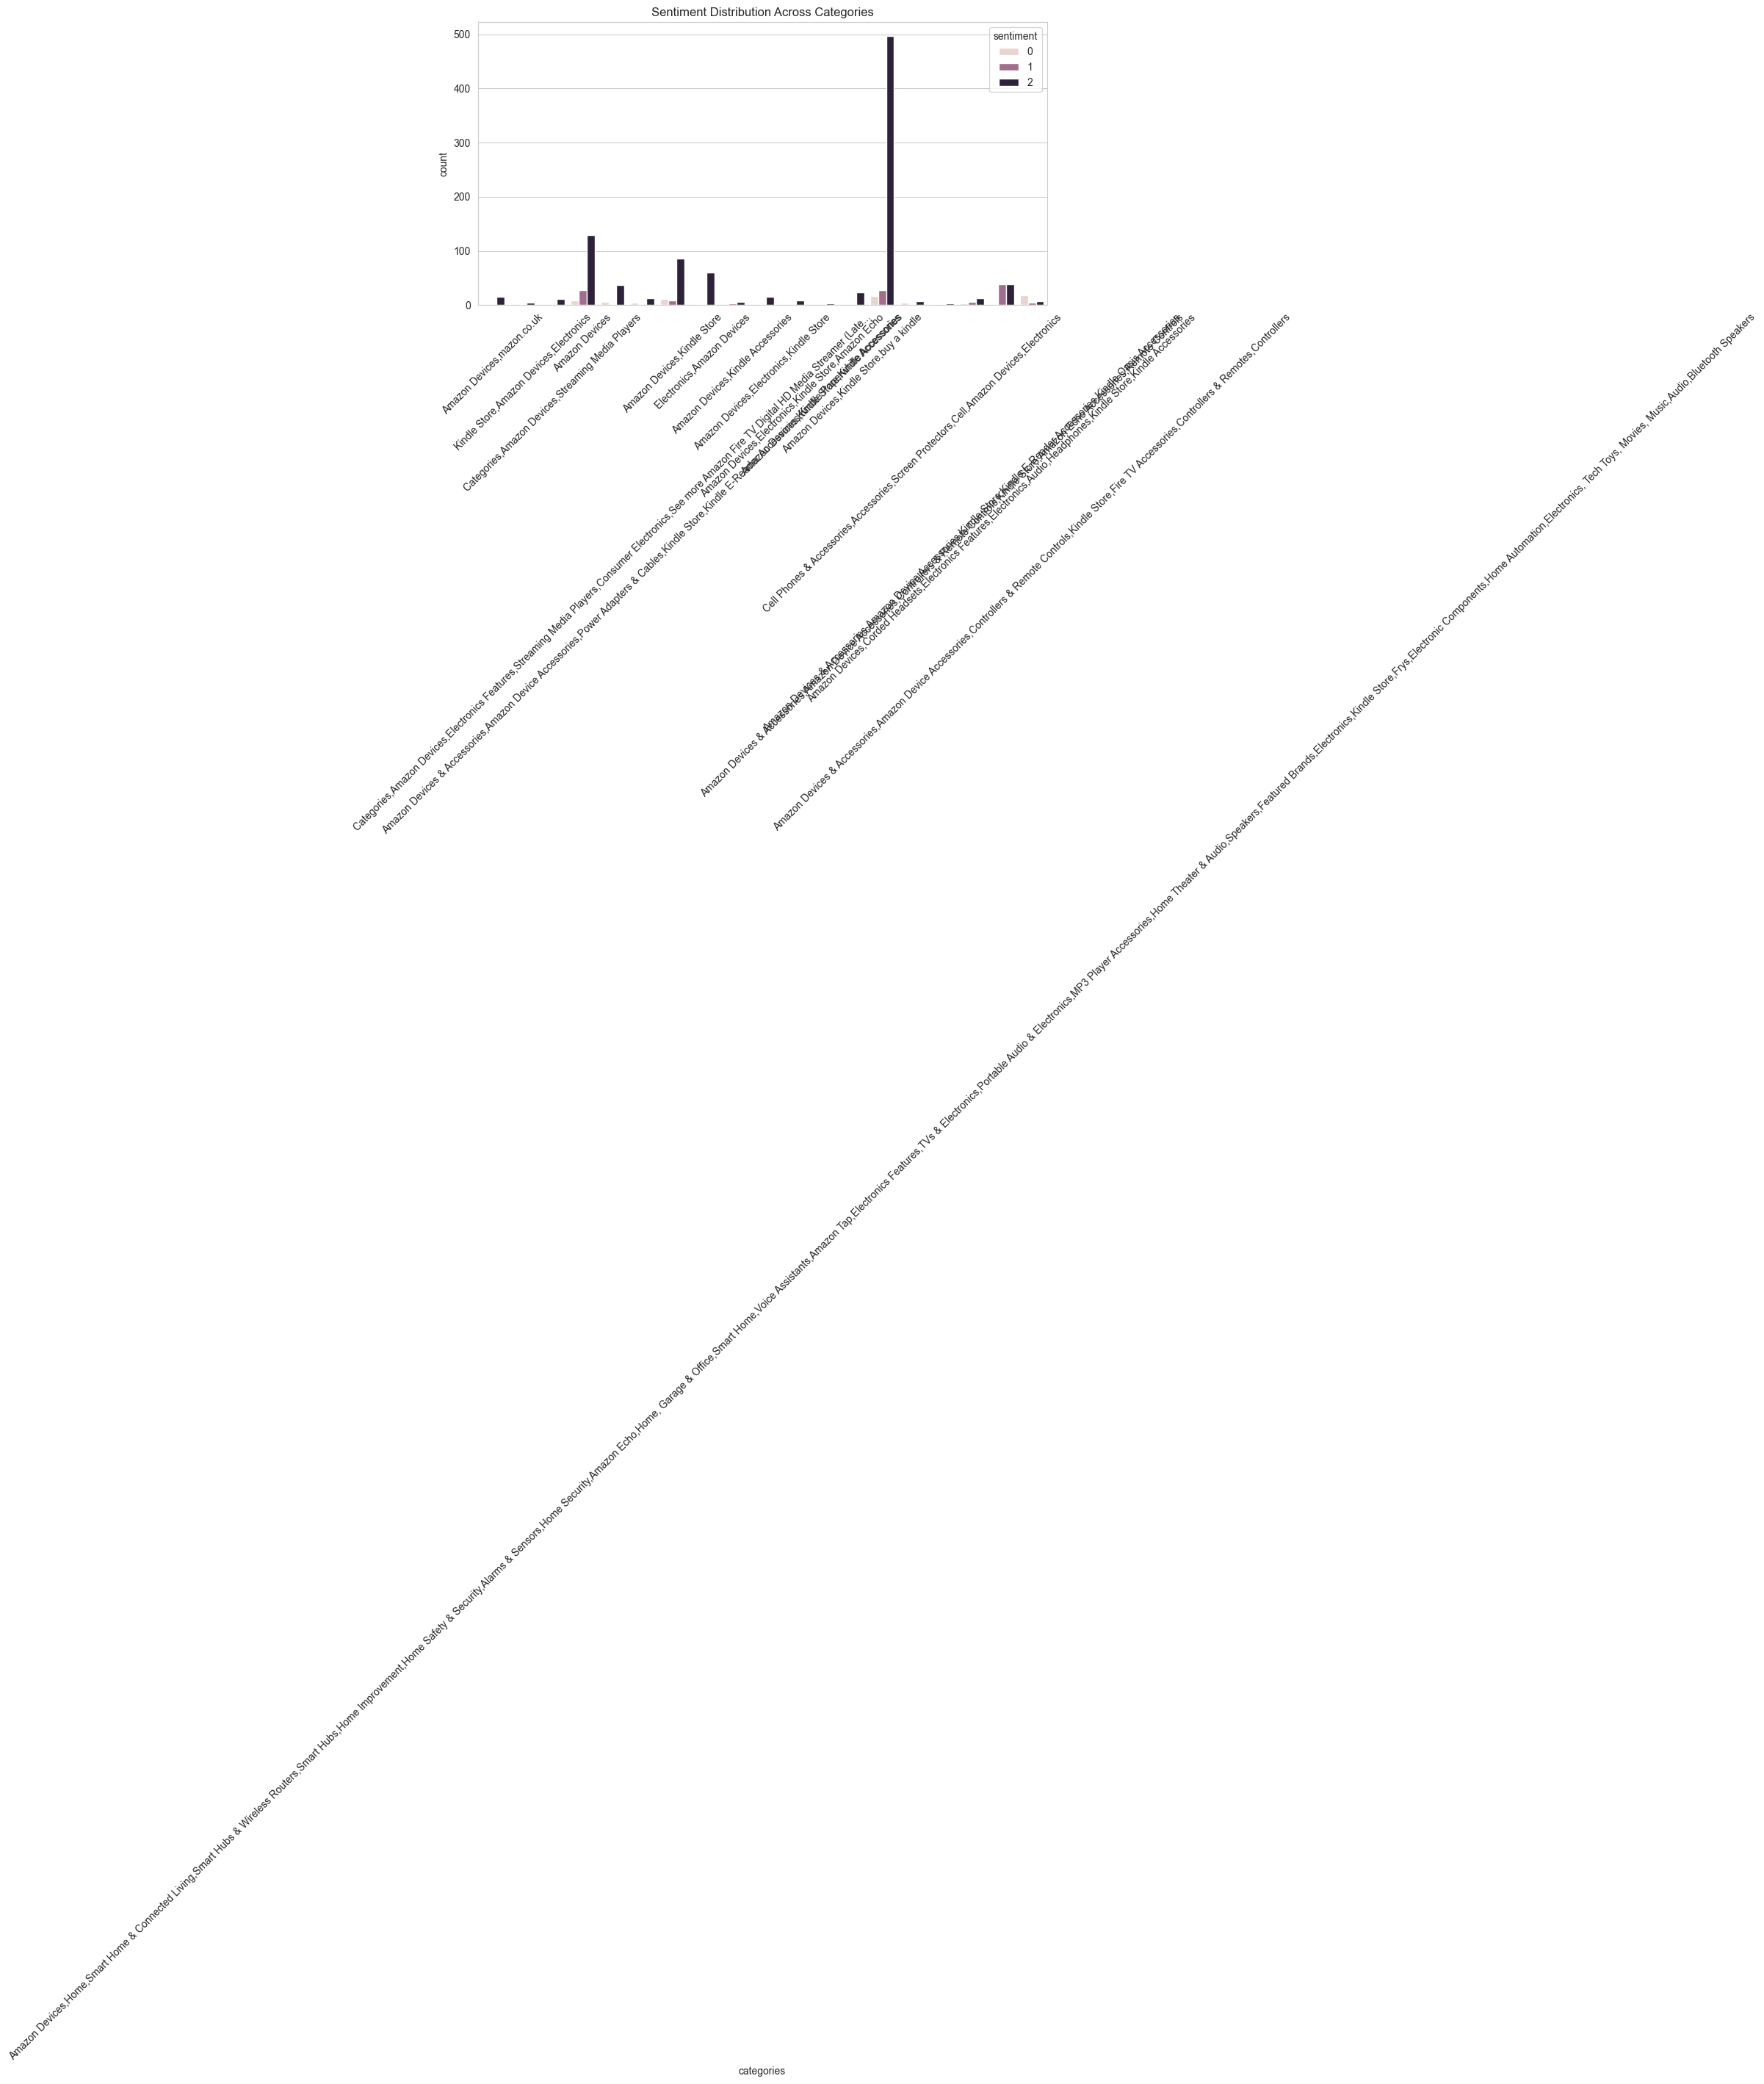

In [28]:
#  Sentiment distribution by brand / category
plt.figure(figsize=(10,5))
sns.countplot(x='brand', hue='sentiment', data=df)
plt.title("Sentiment Distribution Across Brands")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x='categories', hue='sentiment', data=df)
plt.title("Sentiment Distribution Across Categories")
plt.xticks(rotation=45)
plt.show()
